Riddler Classic

From Jason Zimba comes a surprisingly sandy puzzle:

In the Great Riddlerian Desert, there is a single oasis that is straight and narrow. There are N travelers who are trapped at the oasis, and one day, they agree that they will all leave. They independently pick a random location in the oasis from which to start and a random direction in which to travel. Once their supplies are packed, they all head out.

What is the probability that none of their paths will intersect, in terms of N? (For the purposes of this puzzle, assume the oasis is a line segment, while the desert is an infinite Cartesian plane.)

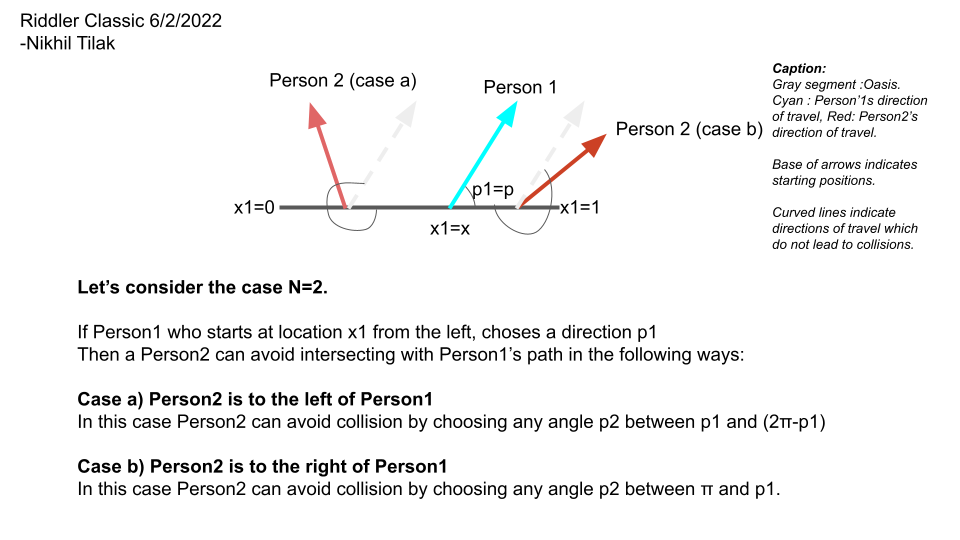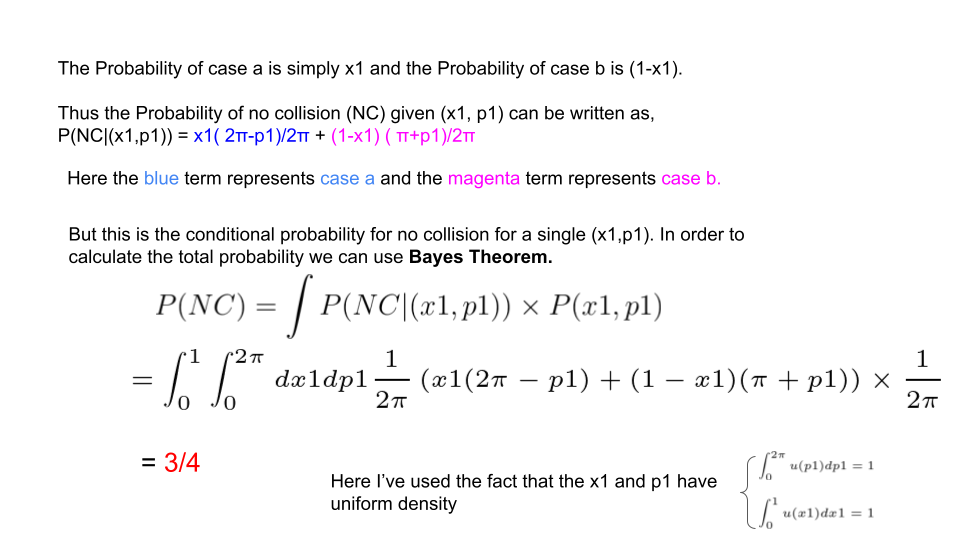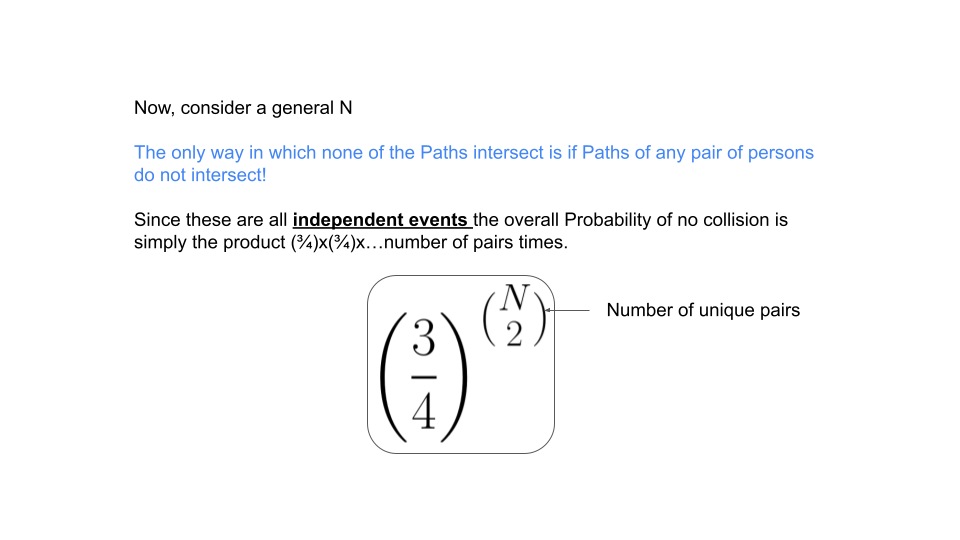

Riddler classic simulation:

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from itertools import combinations

N = 2 # number of persons.
PI = np.pi

@dataclass
class path:
    x: float
    p: float
    def __init__(self, x, p):
        self.x = x
        self.p = p

def generate_path():
    """returns an path containing a starting position and a direction which are uniformly sampled between (-0.5,0.5) and (0,2*pi) respectively """
    x = np.random.uniform(-0.5,0.5) # a random position between -0.50 and 0.50
    p = np.random.uniform(0, 2*PI)

    return path(x,p)

def collision(path1, path2):
    """returns true if collision occurs """
    if (path2.x <= path1.x): # 2 starts to the left of 1
        if path1.p < PI: # angle for 1 is between 0 and PI
            if (path2.p >= path1.p):
                return False
            else:
                return True
        else: # angle for 1 is between PI and 2*PI
            if (path2.p < path1.p):
                return False
            else:
                return True
    else: # 2 starts to the right of 1
        tmp = path1
        path1 = path2
        path2 = tmp
        return collision(path1,path2)

def plot_path(path, color):
    return plt.arrow(path.x, 0, dx=0.5*np.cos(path.p), dy = 0.5*np.sin(path.p), width = 0.03, color = color)

In [123]:
path1 = generate_path()
path2 = generate_path()

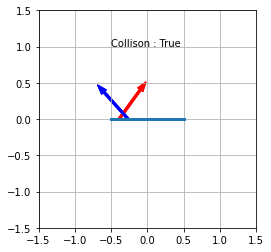

In [136]:
fig, ax = plt.subplots()
ax.plot([-0.5,0.5], [0,0], lw=3)
ax.add_patch(plot_path(path1, 'r'))
ax.add_patch(plot_path(path2, 'b'))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_aspect(1)
ax.grid()
ax.text(-0.5,1,'Collison : ' + str(collision(path1,path2)))
plt.show()

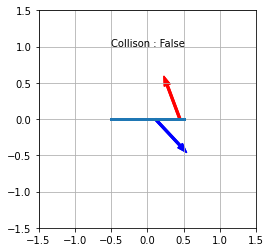

In [137]:
path1 = generate_path()
path2 = generate_path()


fig, ax = plt.subplots()
ax.plot([-0.5,0.5], [0,0], lw=3)
ax.add_patch(plot_path(path1, 'r'))
ax.add_patch(plot_path(path2, 'b'))
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_aspect(1)
ax.grid()
ax.text(-0.5,1,'Collison : ' + str(collision(path1,path2)))
plt.show()


In [129]:
no_collisions = 0
num_trials = 10000
N = 2
paths = []
for i in range(num_trials):
    paths = [generate_path() for i in range(N)]
    pairs = list(combinations(paths, 2))
    collisions = [1 if collision(pair[0],pair[1]) else 0 for pair in pairs] 
    if sum(collisions)==0:
        no_collisions +=1 
    i+=1
print(f"Probability of no collisions is {no_collisions/num_trials}")

Probability of no collisions is 0.7469


In [131]:
prob_no_coll = {}
for N in range(2,8):
    no_collisions = 0
    num_trials = 100000
    paths = []
    for i in range(num_trials):
        paths = [generate_path() for i in range(N)]
        pairs = list(combinations(paths, 2))
        collisions = [1 if collision(pair[0],pair[1]) else 0 for pair in pairs] 
        if sum(collisions)==0:
            no_collisions +=1 
        i+=1
    prob_no_coll[N] = no_collisions/num_trials



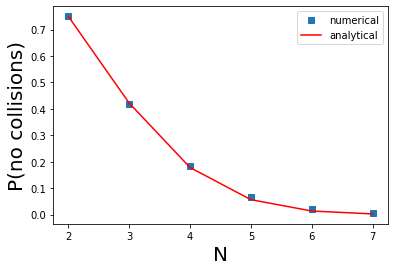

In [138]:
fig, ax = plt.subplots()
ax.plot(list(prob_no_coll.keys()), list(prob_no_coll.values()), 's', label='numerical')
ax.plot(list(prob_no_coll.keys()), [0.75**(i*(i-1)/2) for i in list(prob_no_coll.keys())], 'r-', label = 'analytical')
ax.set_xlabel('N', size = 20)
ax.set_ylabel('P(no collisions)', size=20)
ax.legend()
plt.show()